<a href="https://colab.research.google.com/github/Mahmoudkhaled17/US-Health-Insurance-Dataset/blob/main/US_Health_Insurance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
from google.colab import files
uploaded = files.upload()

Saving kaggle (1).json to kaggle (1) (1).json


In [126]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d teertha/ushealthinsurancedataset


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset
License(s): CC0-1.0
ushealthinsurancedataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [127]:
!unzip ushealthinsurancedataset.zip

Archive:  ushealthinsurancedataset.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [128]:
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [130]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [131]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [132]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

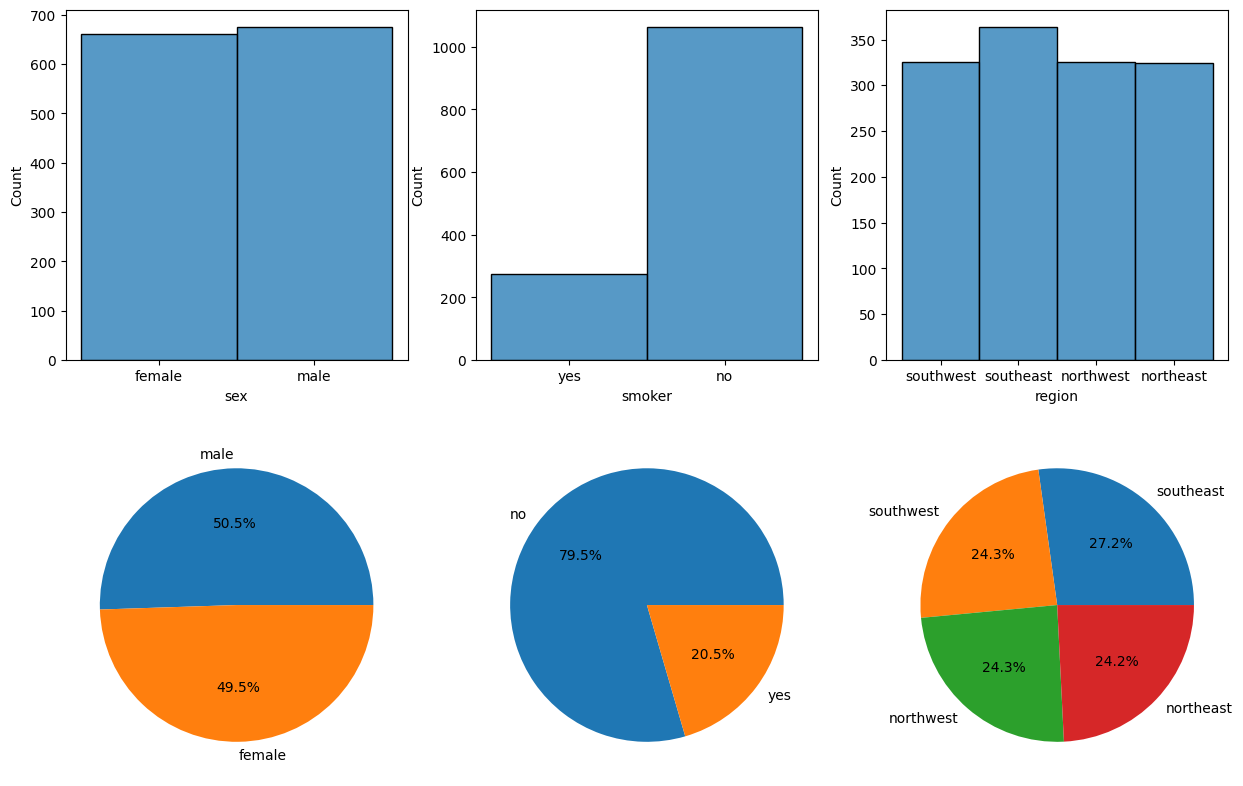

In [134]:
fig,axis=plt.subplots(2,3,figsize=(15,10))
k=0
for i in ["sex","smoker","region"]:
  sns.histplot(df[i],ax=axis[0,k])
  k+=1
k=0
for i in ["sex","smoker","region"]:
  axis[1,k].pie(df[i].value_counts(),labels=df[i].value_counts().index,autopct='%1.1f%%')
  k+=1


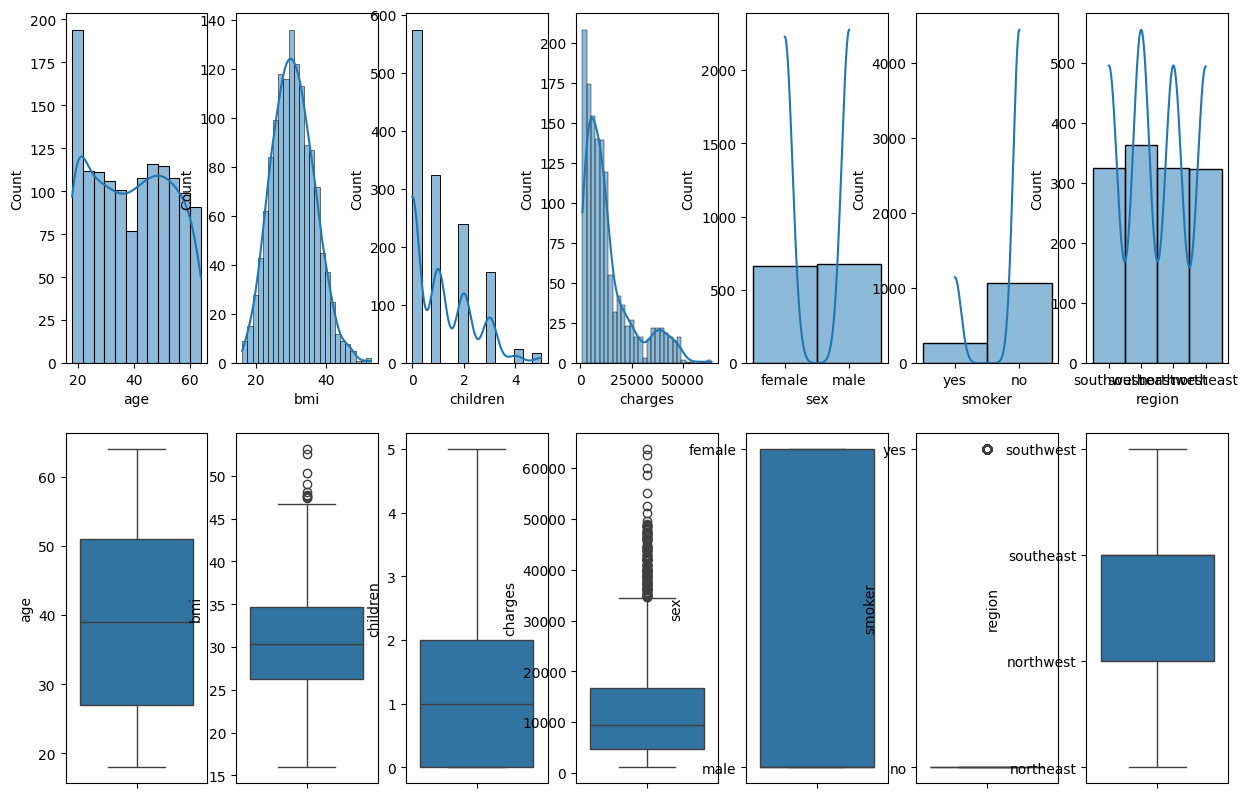

In [135]:
fig,axis=plt.subplots(2,7,figsize=(15,10))
k=0
for i in ["age","bmi","children","charges","sex","smoker","region"]:
  sns.histplot(df[i],ax=axis[0,k],kde=True)
  k+=1
k=0
for i in ["age","bmi","children","charges","sex","smoker","region"]:
  sns.boxplot(df[i],ax=axis[1,k])
  k+=1

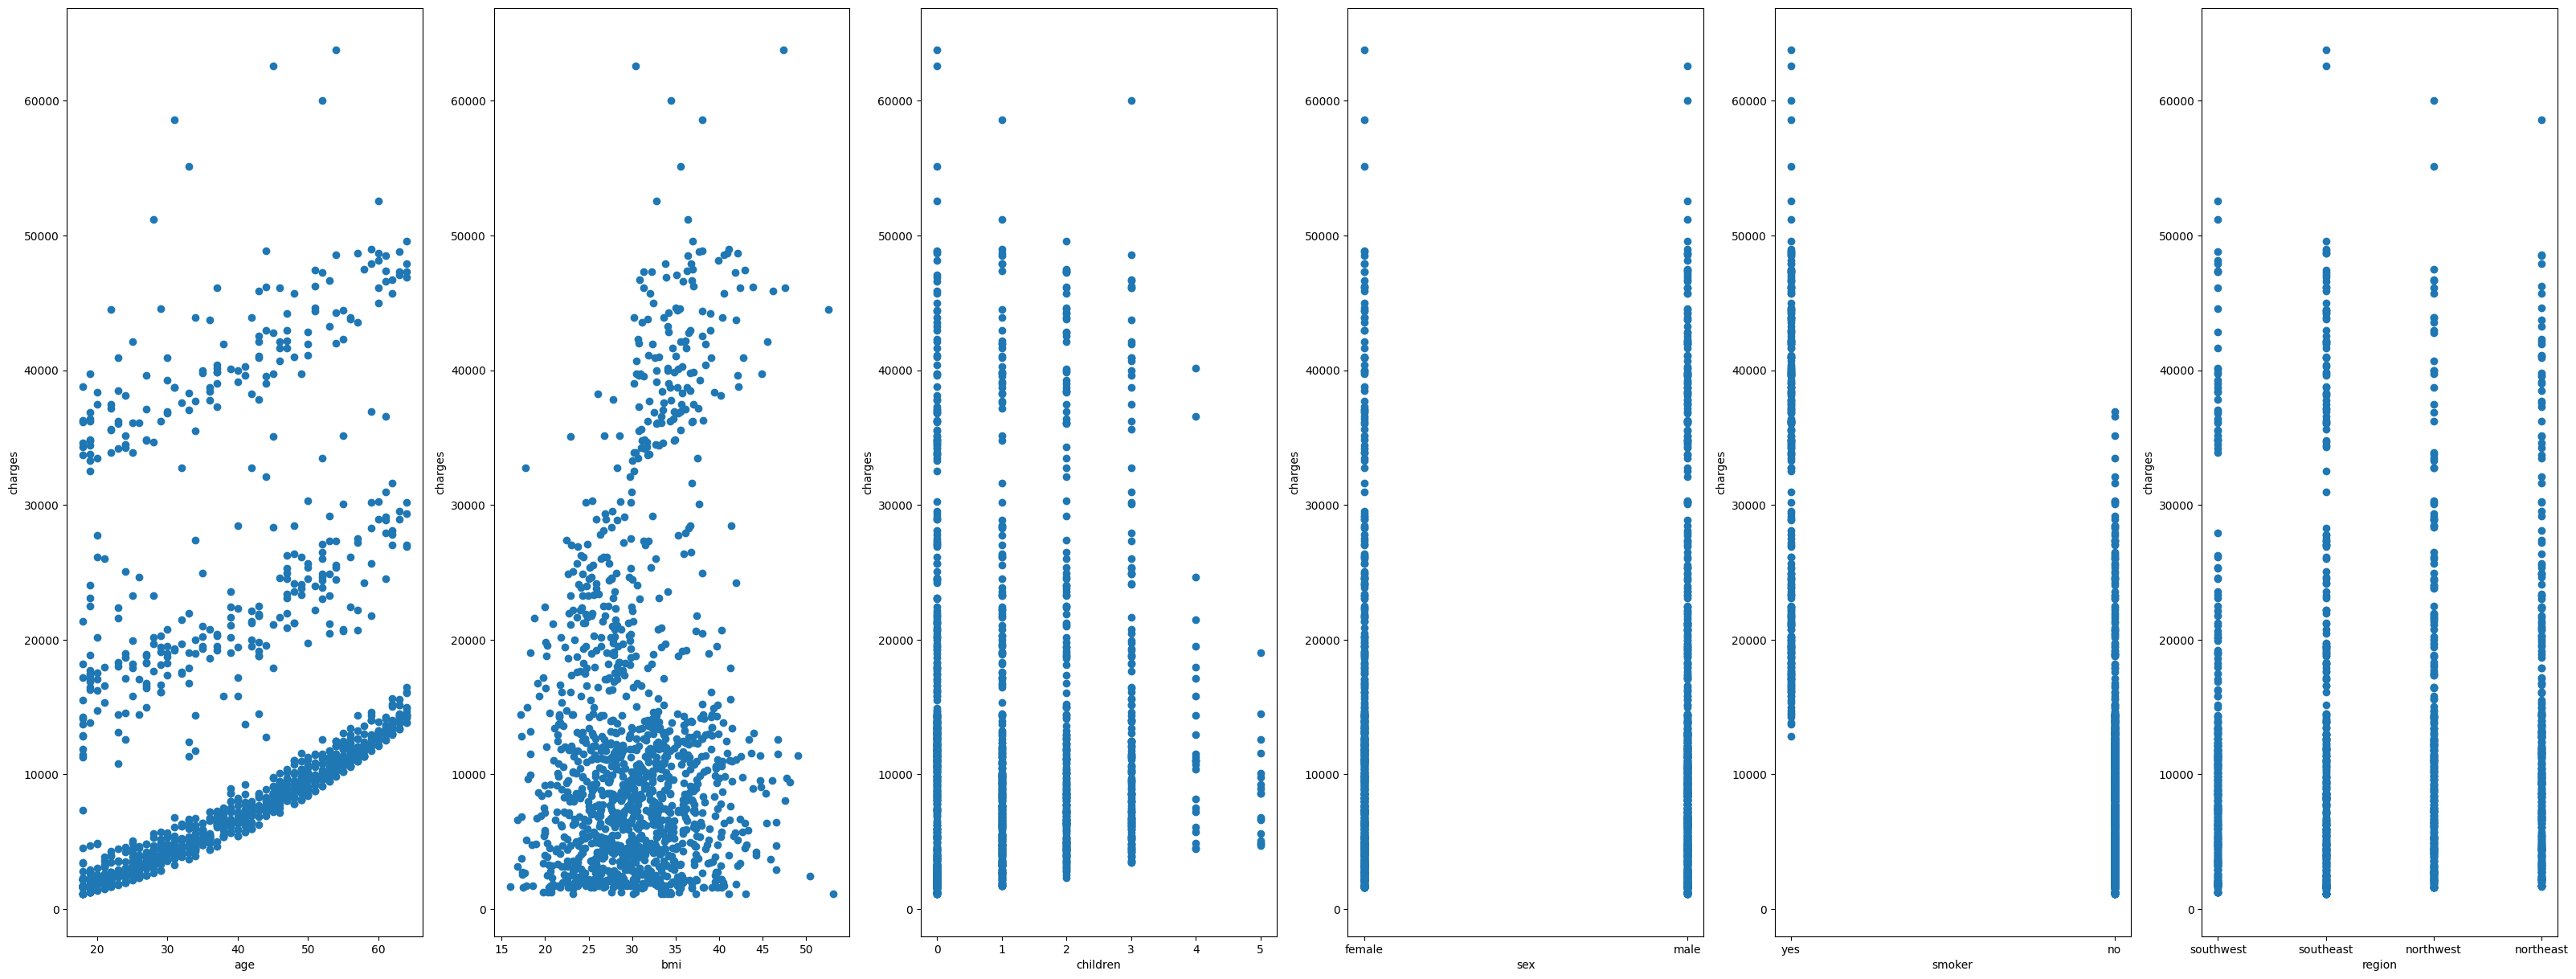

In [136]:
fig,axis=plt.subplots(1,6,figsize=(40,15))
k=0
for i in ["age","bmi","children","sex","smoker","region"]:
  axis[k].scatter(df[i],df["charges"])
  axis[k].set_xlabel(i)
  axis[k].set_ylabel("charges")
  k+=1
k=0

* only preprocessing we need labelencode and ordinal encode

## DATA PREPROCESSING

In [137]:
from operator import le
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le=OrdinalEncoder()
le.fit(df[['sex','smoker']])
df[['sex','smoker']]=le.transform(df[['sex','smoker']])
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,southwest,16884.92400
1,18,1.0,33.770,1,0.0,southeast,1725.55230
2,28,1.0,33.000,3,0.0,southeast,4449.46200
3,33,1.0,22.705,0,0.0,northwest,21984.47061
4,32,1.0,28.880,0,0.0,northwest,3866.85520


In [138]:
la=LabelEncoder()
la.fit(df['region'])
df['region']=la.transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3,16884.92400
1,18,1.0,33.770,1,0.0,2,1725.55230
2,28,1.0,33.000,3,0.0,2,4449.46200
3,33,1.0,22.705,0,0.0,1,21984.47061
4,32,1.0,28.880,0,0.0,1,3866.85520


* using minmax()

In [139]:
df2=df.copy()
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df2[['age','bmi','children','charges',"region"]]=mm.fit_transform(df2[['age','bmi','children','charges',"region"]])
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [140]:
df3=df.copy()
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df3[['age','bmi','children','charges',"region"]]=ss.fit_transform(df3[['age','bmi','children','charges',"region"]])
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0.0,-0.453320,-0.908614,1.0,1.343905,0.298584
1,-1.509965,1.0,0.509621,-0.078767,0.0,0.438495,-0.953689
2,-0.797954,1.0,0.383307,1.580926,0.0,0.438495,-0.728675
3,-0.441948,1.0,-1.305531,-0.908614,0.0,-0.466915,0.719843
4,-0.513149,1.0,-0.292556,-0.908614,0.0,-0.466915,-0.776802


In [269]:
df4=df.copy()
from sklearn.preprocessing import StandardScaler
m_n=StandardScaler()
df4=m_n.fit_transform(df4)
df4=pd.DataFrame(df4,columns=df.columns)
df4.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


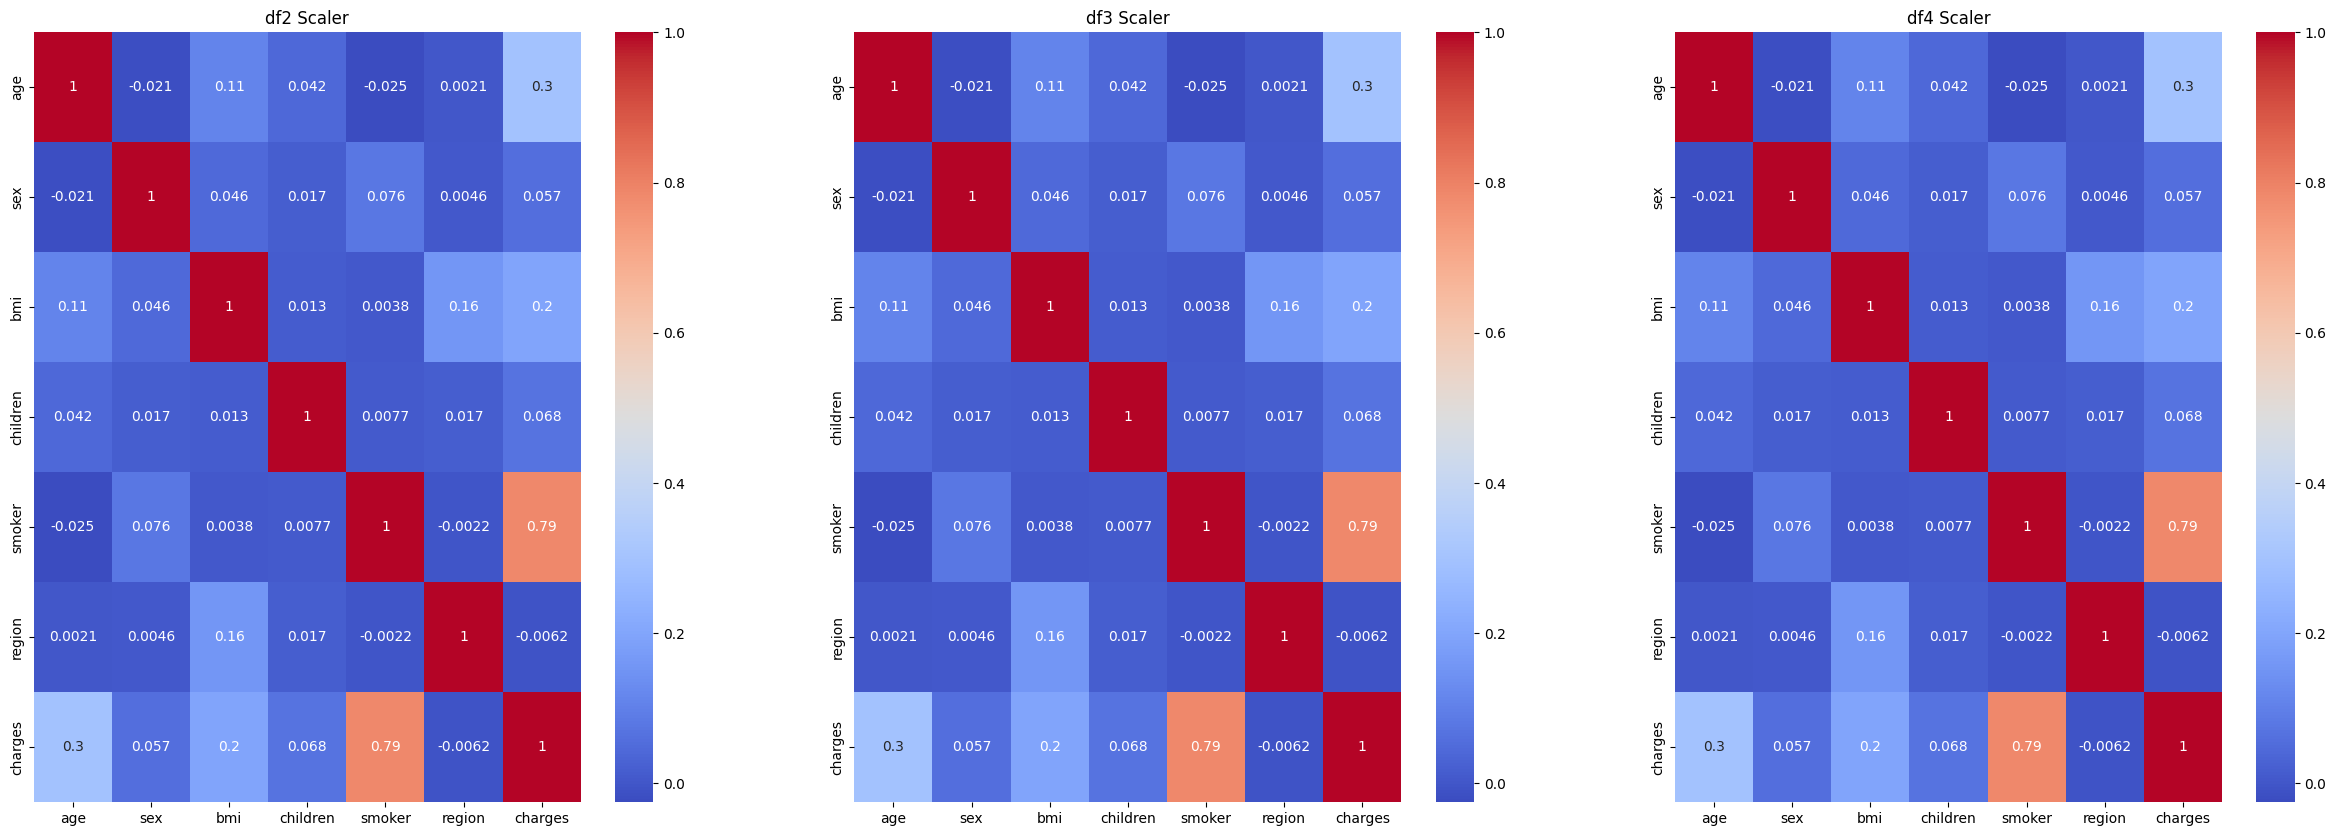

In [142]:
fig,axis=plt.subplots(1,3,figsize=(30,10))
k=0
for i in [df2,df3,df4]:
  sns.heatmap(i.corr(),annot=True,ax=axis[k],cmap="coolwarm")
  axis[k].set_title(f"df{k+2} Scaler")
  k=k+1

## modeling

In [271]:
from sklearn.model_selection import train_test_split
x=df.drop("charges",axis=1)
y=df["charges"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

* linear regression

In [272]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

* random forest

In [273]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

* xgbooster

In [274]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [275]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)

In [276]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_poly,y,test_size=0.2,random_state=42)

In [277]:
lr2=LinearRegression()
lr2.fit(x_train2,y_train2)

LinearRegression()

* accuracy

In [278]:
from sklearn.metrics import r2_score,mean_squared_error

In [279]:
print(f"linear-regression r2:{r2_score(y_test,lr.predict(x_test))*100}")
print(f"random-forest r2:{r2_score(y_test,rf.predict(x_test))*100}")
print(f"xgboost r2:{r2_score(y_test,xg.predict(x_test))*100}")

linear-regression r2:78.33463107364538
random-forest r2:86.49339014090465
xgboost r2:85.01678977480664


In [280]:
print(f"linear-regression-poly r2:{r2_score(y_test2,lr2.predict(x_test2))*100}")

linear-regression-poly r2:86.49218598160482


* plot the model prediction

Text(0.5, 1.0, 'linear-regression-poly')

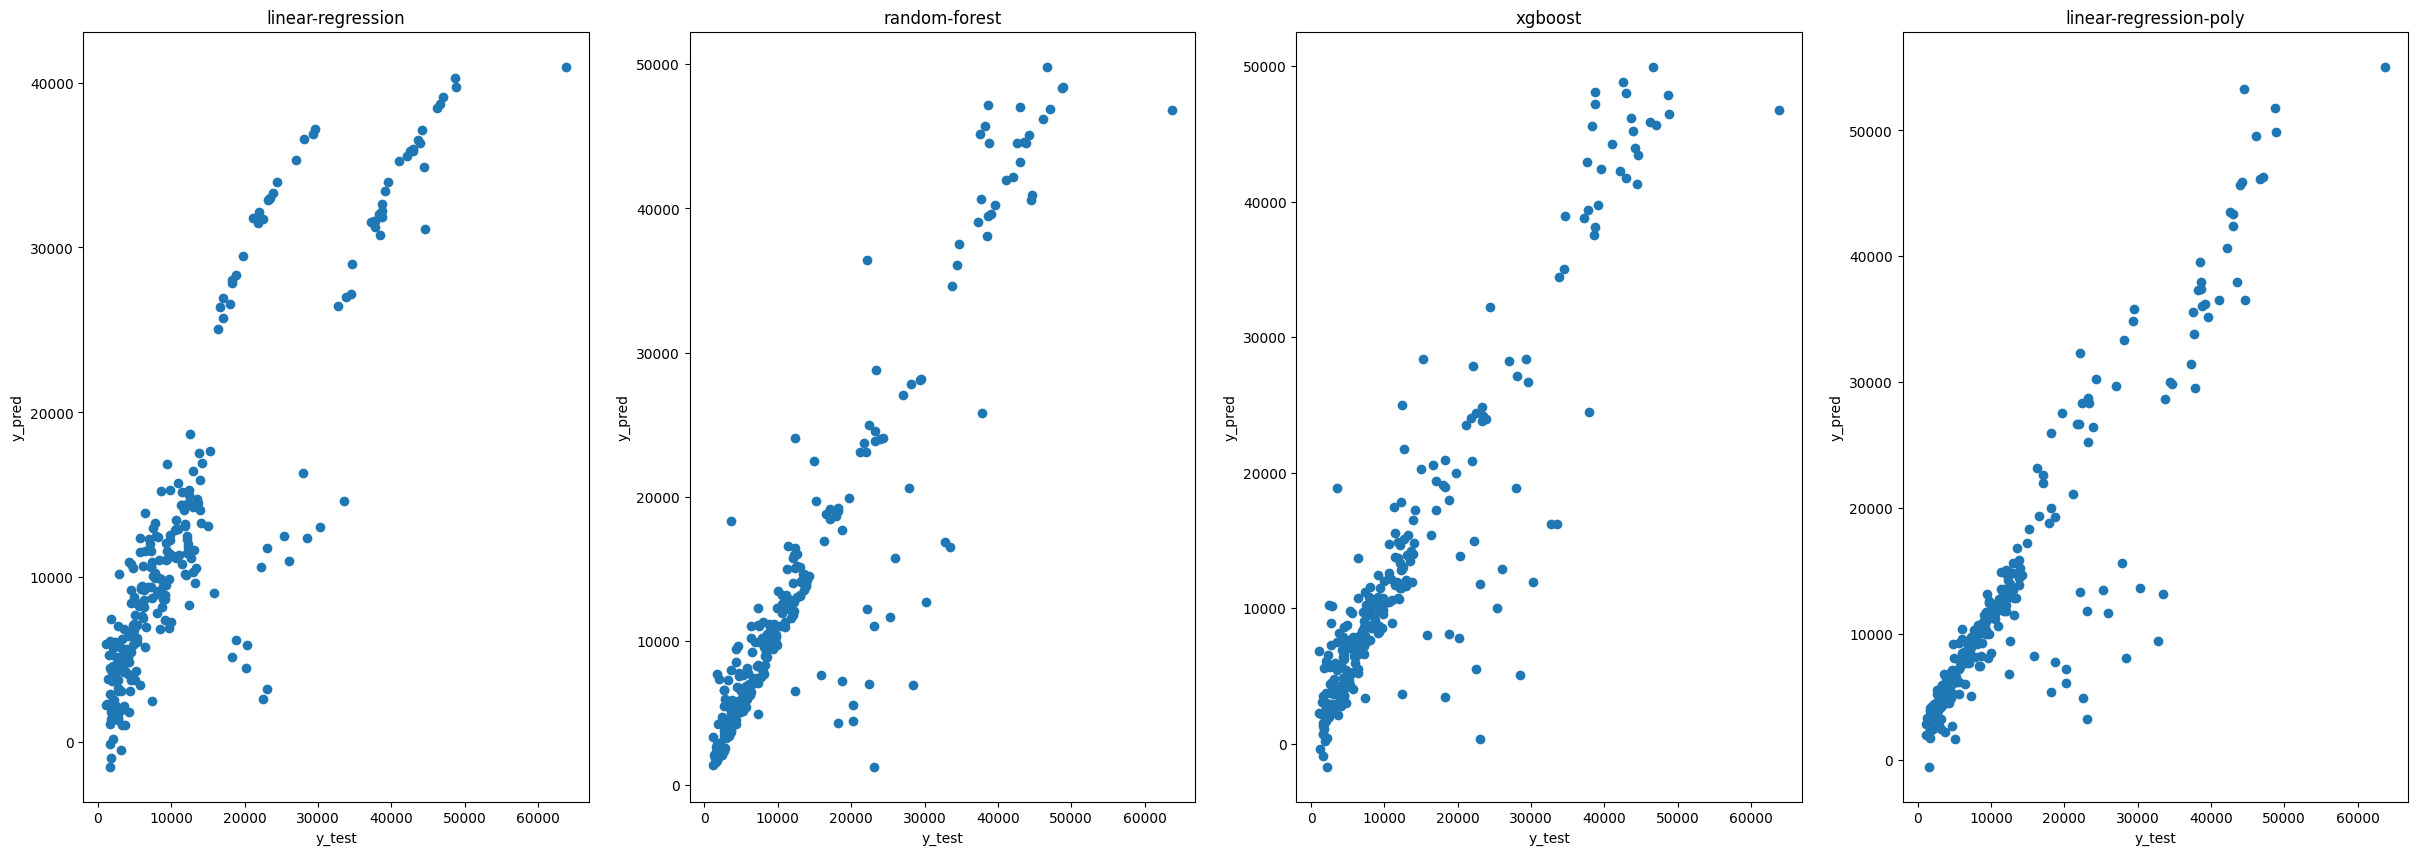

In [281]:
fig,axis=plt.subplots(1,4,figsize=(30,10))
for i in range(4):
  axis[i].set_xlabel("y_test")
  axis[i].set_ylabel("y_pred")
axis[0].scatter(y_test,lr.predict(x_test))
axis[0].set_title("linear-regression")
axis[1].scatter(y_test,rf.predict(x_test))
axis[1].set_title("random-forest")
axis[2].scatter(y_test,xg.predict(x_test))
axis[2].set_title("xgboost")
axis[3].scatter(y_test2,lr2.predict(x_test2))
axis[3].set_title("linear-regression-poly")

In [282]:
lr_r2=r2_score(y_test,lr.predict(x_test))*100
rf_r2=r2_score(y_test,rf.predict(x_test))*100
xg_r2=r2_score(y_test,xg.predict(x_test))*100
lr2_r2=r2_score(y_test2,lr2.predict(x_test2))*100

<BarContainer object of 4 artists>

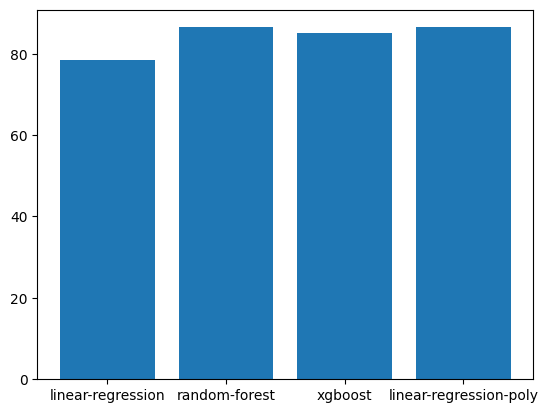

In [283]:
plt.bar(["linear-regression","random-forest","xgboost","linear-regression-poly"],[lr_r2,rf_r2,xg_r2,lr2_r2])

## save model


In [284]:
import pickle

# Assuming you have a trained model (e.g., `model`)
model_filename = 'my_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)
print(f"Model saved as {model_filename}")

Model saved as my_model.pkl


In [285]:
import pickle

# Load the saved model
model_filename = 'my_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

## gradio

In [286]:
pip install gradio

In [287]:
import gradio as gr

In [288]:
def predict_charges(age, sex, bmi, children, smoker, region):
  import pickle

  # Load the saved model
  model_filename = 'my_model.pkl'
  with open(model_filename, 'rb') as file:
      loaded_model = pickle.load(file)
  result=loaded_model.predict([[age, sex, bmi, children, smoker, region]])[0]
  return f"the out is {result}"

In [289]:
app=gr.Interface(fn=predict_charges,inputs=["number","number","number","number","number","number"],outputs="text")
app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://92e97d40d13897b897.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
